In [3]:
# Fuseki IO Development V
## Refinement

# Attach dir one above to handle IDE subdir
import sys, os
module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

print(sys.path)
    
import repository
from rdflib import URIRef, Graph, Namespace

from DMEAR import DMEAR_vis 
from visualize_model import visualize, t2rdflibg, get_field

import pandas as pd
import html
import io
import pydotplus
from rdflib.tools.rdf2dot import rdf2dot
from IPython.display import display, Image
import difflib
from urllib.error import HTTPError

from datetime import datetime

start = datetime.now()
import text_utils

['/home/tomk/Documents/Coding/gitHub/datamodels/IDE', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/tomk/environment/devpy/lib/python3.10/site-packages', '/home/tomk/Documents/Coding/gitHub/daglit/src', '/home/tomk/Documents/Coding/gitHub/datamodels/src']


In [4]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    #print(stream.getvalue())
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()

    display(Image(png))

def t2rdflibg(triples): #triples to rdflib graph
    g = Graph()
    for t in triples:
        g.add(t)
    return g

def get_field(v):
    if isinstance(v,str):
        return html.escape(str(v))
    elif isinstance(v,(int, float)):
        if pd.isnull(v):
            return None
        else:
            return v
    elif v is None or isinstance(v,pd.Null):
        return None

In [5]:
store_type="jena"
#store_type="memory"
repo = repository.Repository(store_type=store_type)

In [6]:
# Optional Delete data hosted in master and discourse database graphs
do="Yes"
#do="No"

if do == "Yes" and store_type != "memory":
    repo.truncate_graph(repo.master_graph_uri)
    repo.truncate_graph(repo.discourse_graph_uri)
    

In [7]:
cqr=repo.run_cached_query("get_discourse_details.sparql")
cqr

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX disco: <http://www.semanticweb.org/tomk/ontologies/2022/11/discourse#> 
PREFIX dcterms: <http://purl.org/dc/terms/> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 

select ?g ?discourse ?name ?title ?description ?created ?hash (COUNT(?declaration) as ?declarations) (COUNT(distinct ?psubject) as ?entities)

WHERE {
  GRAPH ?g
  {
      ?discourse a disco:Discourse.
      ?discourse dcterms:title ?title.
      ?discourse rdfs:label ?name.
      ?discourse dcterms:description ?description.
      ?discourse dcterms:created ?created .
      ?discourse disco:DiscourseHash ?hash .
      ?discourse disco:DiscourseContains+ ?declaration .
      ?declaration a disco:Declaration .
      ?posit_type rdfs:subPropertyOf* disco:Posits .
      ?declaration disco:Asserts ?assertion.
      ?assertion disco:Subject ?psubject.
  }
}
GROUP BY ?g ?discourse ?name ?title ?description ?created ?hash


[]

In [9]:

repo.register_serialization("../src/models/sample/sample_ser.rdf")
repo.register_serialization("../src/DMEAR/DMEAR_ser.rdf")

In [10]:
file_dtypes = {'ModelDomain': str,
 'Model': str,
 'ModelType': str,
 'Class': str,
 'ClassDescription': str,
 'Attribute': str,
 'AttributeDescription': str,
 'DataType': str,
 'Context': str,
 'SubContext': str,
 'Nulls': str,
 'IsPK': str,
 'Relationship': str,
 'FromClass': str,
 'FromAttribute': str,
 'FromCardinality': str,
 'ToClass': str,
 'ToAttribute': str,
 'ToCardinality': str}


In [11]:
mpd = {"created" : "2023-04-10", 
                   "creator" : "tomk", 
                   "description" : "Sample ERD model version 1", 
                   "title" : "inventory ERD", 
                   "modified" : "2023-04-10"}

metadata_payload = repo.meta_data_package_template( mpd )
title = "Inventory ERD v1.0"
model_data = pd.read_csv(r"../sample/inventory_v1.csv", index_col="Sequence", dtype=file_dtypes)
datarows = [dict({rk:get_field(rv) for rk, rv in r.items()}) for i,r in model_data.iterrows()]
repo.load_serialization_to_discourse("Data Model Entity Attribute Relation Serialization", mpd['title'], metadata_payload, datarows)

//////LOCATE1/////
0:00:00.126704 for 93 from 9
//////LOCATE2/////
self.members: 93
0:00:02.553231 for 1218 triples


In [12]:
mpd = {"created" : "2023-04-11", 
                   "creator" : "tomk", 
                   "description" : "Sample ERD model version 2", 
                   "title" : "inventory ERD", 
                   "modified" : "2023-04-11"}
metadata_payload = repo.meta_data_package_template( mpd )
title = "Inventory ERD v2.0"
model_data = pd.read_csv(r"../sample/inventory_v2.csv", index_col="Sequence", dtype=file_dtypes)
datarows = [dict({rk:get_field(rv) for rk, rv in r.items()}) for i,r in model_data.iterrows()]
repo.load_serialization_to_discourse("Data Model Entity Attribute Relation Serialization", mpd['title'], metadata_payload, datarows)

//////LOCATE1/////
0:00:00.035385 for 177 from 18
//////LOCATE2/////
self.members: 177
0:00:02.071036 for 2310 triples


In [13]:
mpd = {"created" : "2023-04-12", 
                   "creator" : "tomk", 
                   "description" : "Sample ERD model version 3", 
                   "title" : "inventory ERD", 
                   "modified" : "2023-04-12"}
metadata_payload = repo.meta_data_package_template( mpd )
title = "Inventory ERD v3.0"
model_data = pd.read_csv(r"../sample/inventory_v3.csv", index_col="Sequence", dtype=file_dtypes)
datarows = [dict({rk:get_field(rv) for rk, rv in r.items()}) for i,r in model_data.iterrows()]
repo.load_serialization_to_discourse("Data Model Entity Attribute Relation Serialization", mpd['title'], metadata_payload, datarows)

//////LOCATE1/////
0:00:00.068151 for 412 from 44
//////LOCATE2/////
self.members: 412
0:00:03.146052 for 5365 triples


In [14]:
mpd = {"created" : "2023-04-13", 
                   "creator" : "tomk", 
                   "description" : "Sample ERD model version 4", 
                   "title" : "inventory ERD", 
                   "modified" : "2023-04-13"}
metadata_payload = repo.meta_data_package_template( mpd )
title = "Inventory ERD v4.0"
model_data = pd.read_csv(r"../sample/inventory_v4.csv", index_col="Sequence", dtype=file_dtypes)
datarows = [dict({rk:get_field(rv) for rk, rv in r.items()}) for i,r in model_data.iterrows()]
repo.load_serialization_to_discourse("Data Model Entity Attribute Relation Serialization", mpd['title'], metadata_payload, datarows)

//////LOCATE1/////
0:00:00.073823 for 439 from 47
//////LOCATE2/////
self.members: 439
0:00:03.231094 for 5716 triples


In [15]:
repo.discourse_hashes

[('d917eeeb21ad-cd4c-05c7-8c59cf9a1ce9',
  'http://www.semanticweb.org/tomk/ontologies/2022/11/a21d00500aaa4e6c9e78e42aa43d8438'),
 ('bc21c04cb730-214a-7bc3-fc3bf437b51e',
  'http://www.semanticweb.org/tomk/ontologies/2022/11/2211f22f641042339ce016f73ab2eec3'),
 ('cabd98489599-7c04-11f2-5643034830d9',
  'http://www.semanticweb.org/tomk/ontologies/2022/11/ed45620414ed4ec797b4338357acf7b2'),
 ('71cbe388ea4c-b654-d411-d183647c4398',
  'http://www.semanticweb.org/tomk/ontologies/2022/11/1e88cb2e832f49f99f2632940b6b0f5a')]

In [16]:
qr = repo.run_cached_query("get_discourse_details.sparql")
qr_df = pd.DataFrame(qr)
qr_df

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX disco: <http://www.semanticweb.org/tomk/ontologies/2022/11/discourse#> 
PREFIX dcterms: <http://purl.org/dc/terms/> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 

select ?g ?discourse ?name ?title ?description ?created ?hash (COUNT(?declaration) as ?declarations) (COUNT(distinct ?psubject) as ?entities)

WHERE {
  GRAPH ?g
  {
      ?discourse a disco:Discourse.
      ?discourse dcterms:title ?title.
      ?discourse rdfs:label ?name.
      ?discourse dcterms:description ?description.
      ?discourse dcterms:created ?created .
      ?discourse disco:DiscourseHash ?hash .
      ?discourse disco:DiscourseContains+ ?declaration .
      ?declaration a disco:Declaration .
      ?posit_type rdfs:subPropertyOf* disco:Posits .
      ?declaration disco:Asserts ?assertion.
      ?assertion disco:Subject ?psubject.
  }
}
GROUP BY ?g ?discourse ?name ?title ?description ?created ?hash


g                                          discourse  \
0  http://discourse  http://www.semanticweb.org/tomk/ontologies/202...   
1  http://discourse  http://www.semanticweb.org/tomk/ontologies/202...   
2  http://discourse  http://www.semanticweb.org/tomk/ontologies/202...   
3  http://discourse  http://www.semanticweb.org/tomk/ontologies/202...   

                      name          title                 description  \
0  discourse_inventory ERD  inventory ERD  Sample ERD model version 4   
1  discourse_inventory ERD  inventory ERD  Sample ERD model version 1   
2  discourse_inventory ERD  inventory ERD  Sample ERD model version 3   
3  discourse_inventory ERD  inventory ERD  Sample ERD model version 2   

      created                                 hash  declarations  entities  
0  2023-04-13  d917eeeb21ad-cd4c-05c7-8c59cf9a1ce9           439        59  
1  2023-04-10  bc21c04cb730-214a-7bc3-fc3bf437b51e            93        13  
2  2023-04-12  cabd98489599-7c04-11f2-5643034830d9           412        56  
3  2023-04-11  71cbe388ea4c-b654-d411-d183647c4398           177        24

In [ ]:
qr

In [17]:
qi = qr_df.query("description in ['Sample ERD model version 3', 'Sample ERD model version 4'] ").index.values
qi

array([0, 2])

In [18]:
dict(qr_df.iloc[3])

{'g': 'http://discourse',
 'discourse': 'http://www.semanticweb.org/tomk/ontologies/2022/11/1e88cb2e832f49f99f2632940b6b0f5a',
 'name': 'discourse_inventory ERD',
 'title': 'inventory ERD',
 'description': 'Sample ERD model version 2',
 'created': '2023-04-11',
 'hash': '71cbe388ea4c-b654-d411-d183647c4398',
 'declarations': 177,
 'entities': 24}

In [19]:
d1 = qr_df.iloc[qi[0]]['discourse']
d2 = qr_df.iloc[qi[1]]['discourse']
#get_posits_sparql = sparql.replace("%%p1%%", ",".join([d1,d2]))

d1,d2

('http://www.semanticweb.org/tomk/ontologies/2022/11/a21d00500aaa4e6c9e78e42aa43d8438',
 'http://www.semanticweb.org/tomk/ontologies/2022/11/ed45620414ed4ec797b4338357acf7b2')

In [20]:

qr = repo.run_cached_query("get_discourse_posits_parms_discourse_iris.sparql", parameters=[",".join([URIRef(d1).n3(),URIRef(d2).n3()])], native_rdflib=True)
#results = list([{k:v[e] for e,k in enumerate([v.n3()[1:] for v in qr.vars])} for v in qr])
dcontents = pd.DataFrame(qr)
#set(dcontents['p'])
dcontents

('%%p0%%', '<http://www.semanticweb.org/tomk/ontologies/2022/11/a21d00500aaa4e6c9e78e42aa43d8438>,<http://www.semanticweb.org/tomk/ontologies/2022/11/ed45620414ed4ec797b4338357acf7b2>')
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX disco: <http://www.semanticweb.org/tomk/ontologies/2022/11/discourse#> 
PREFIX dcterms: <http://purl.org/dc/terms/> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 

select ?g ?discourse ?assertion ?refutation ?posit ?s ?p ?o
WHERE {
  GRAPH ?g
  {
      ?discourse a disco:Discourse.
      ?discourse disco:DiscourseContains+ ?declaration .
      ?declaration a disco:Declaration .
        OPTIONAL { ?declaration disco:Asserts ?assertion. 
                   ?assertion disco:Subject ?s.
                   ?assertion disco:Predicate ?p.
                   ?assertion disco:Object ?o.
                   }
        OPTIONAL { ?declaration disco:Refutes ?refutation. 
                   ?refutation disco:Subject ?s.
                   ?refuta

g                                          discourse  \
0    http://discourse  http://www.semanticweb.org/tomk/ontologies/202...   
1    http://discourse  http://www.semanticweb.org/tomk/ontologies/202...   
2    http://discourse  http://www.semanticweb.org/tomk/ontologies/202...   
3    http://discourse  http://www.semanticweb.org/tomk/ontologies/202...   
4    http://discourse  http://www.semanticweb.org/tomk/ontologies/202...   
..                ...                                                ...   
846  http://discourse  http://www.semanticweb.org/tomk/ontologies/202...   
847  http://discourse  http://www.semanticweb.org/tomk/ontologies/202...   
848  http://discourse  http://www.semanticweb.org/tomk/ontologies/202...   
849  http://discourse  http://www.semanticweb.org/tomk/ontologies/202...   
850  http://discourse  http://www.semanticweb.org/tomk/ontologies/202...   

                                             assertion refutation posit  \
0    http://www.semanticweb.org/tomk/ontologies/202...       None  None   
1    http://www.semanticweb.org/tomk/ontologies/202...       None  None   
2    http://www.semanticweb.org/tomk/ontologies/202...       None  None   
3    http://www.semanticweb.org/tomk/ontologies/202...       None  None   
4    http://www.semanticweb.org/tomk/ontologies/202...       None  None   
..                                                 ...        ...   ...   
846  http://www.semanticweb.org/tomk/ontologies/202...       None  None   
847  http://www.semanticweb.org/tomk/ontologies/202...       None  None   
848  http://www.semanticweb.org/tomk/ontologies/202...       None  None   
849  http://www.semanticweb.org/tomk/ontologies/202...       None  None   
850  http://www.semanticweb.org/tomk/ontologies/202...       None  None   

                                                     s  \
0    http://www.semanticweb.org/tomk/ontologies/202...   
1    http://www.semanticweb.org/tomk/ontologies/202...   
2    http://www.semanticweb.org/tomk/ontologies/202...   
3    http://www.semanticweb.org/tomk/ontologies/202...   
4    http://www.semanticweb.org/tomk/ontologies/202...   
..                                                 ...   
846  http://www.semanticweb.org/tomk/ontologies/202...   
847  http://www.semanticweb.org/tomk/ontologies/202...   
848  http://www.semanticweb.org/tomk/ontologies/202...   
849  http://www.semanticweb.org/tomk/ontologies/202...   
850  http://www.semanticweb.org/tomk/ontologies/202...   

                                                     p  \
0    http://www.semanticweb.org/tomk/ontologies/202...   
1    http://www.semanticweb.org/tomk/ontologies/202...   
2           http://www.w3.org/2000/01/rdf-schema#label   
3           http://www.w3.org/2000/01/rdf-schema#label   
4    http://www.semanticweb.org/tomk/ontologies/202...   
..                                                 ...   
846  http://www.semanticweb.org/tomk/ontologies/202...   
847  http://www.semanticweb.org/tomk/ontologies/202...   
848  http://www.semanticweb.org/tomk/ontologies/202...   
849    http://www.w3.org/1999/02/22-rdf-syntax-ns#type   
850  http://www.semanticweb.org/tomk/ontologies/202...   

                                                     o  
0                                              integer  
1               Identifier for the parent quote/order.  
2                                                 p_id  
3                                    referencesProduct  
4    http://www.semanticweb.org/tomk/ontologies/202...  
..                                                 ...  
846  _.Simple ERD Model - Inventory.PriceHistory.price  
847                                             string  
848                                                 No  
849  http://www.semanticweb.org/tomk/ontologies/202...  
850  http://www.semanticweb.org/tomk/ontologies/202...  

[851 rows x 8 columns]

In [21]:

dcontents['triple'] = dcontents.apply(lambda x : tuple([x['s'], x['p'], x['o']]), axis=1)
dcd = dcontents.groupby(['discourse'])['triple'].agg(set).to_dict()

In [22]:
d1, d2

('http://www.semanticweb.org/tomk/ontologies/2022/11/a21d00500aaa4e6c9e78e42aa43d8438',
 'http://www.semanticweb.org/tomk/ontologies/2022/11/ed45620414ed4ec797b4338357acf7b2')

In [23]:
from rdflib.util import from_n3
URIRef(d1)

rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/a21d00500aaa4e6c9e78e42aa43d8438')

In [24]:
dcd.keys()

dict_keys([rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/a21d00500aaa4e6c9e78e42aa43d8438'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/ed45620414ed4ec797b4338357acf7b2')])

In [25]:
dcd.get(d1)

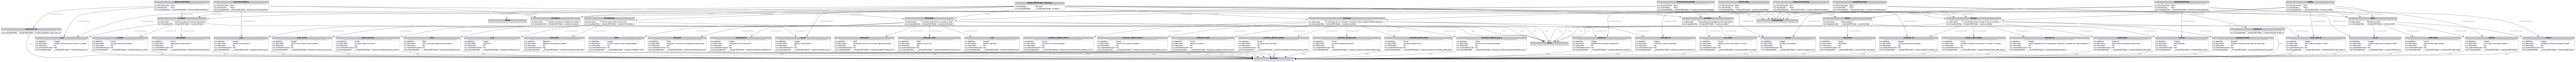

In [26]:
s1 = dcd.get(URIRef(d1))
s2 = dcd.get(URIRef(d2))
visualize(t2rdflibg(s1))

In [27]:
option_dict = { "u_label" : True, 
                "label" : True, 
                "desc" : True, 
                "optionality" : True, 
                "pk" : True, 
                "datatype" : True }

option_dict["optionality"]!=False

True

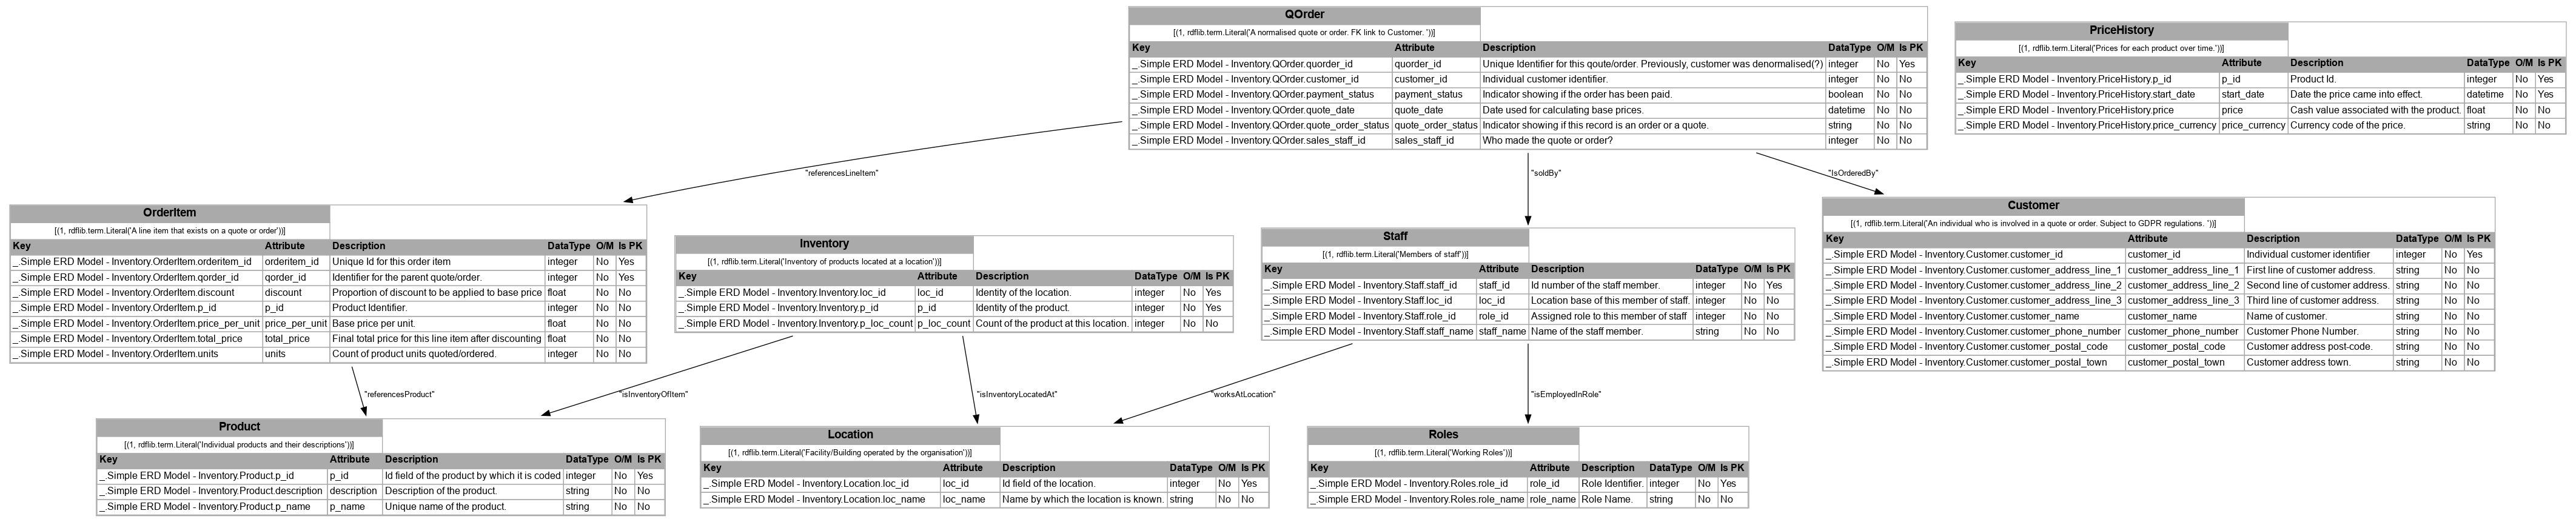

In [28]:
display(Image(DMEAR_vis.DMEAR_vizdiff_to_graph(s1, s1, option_dict, engine="dot", v_type="png")))

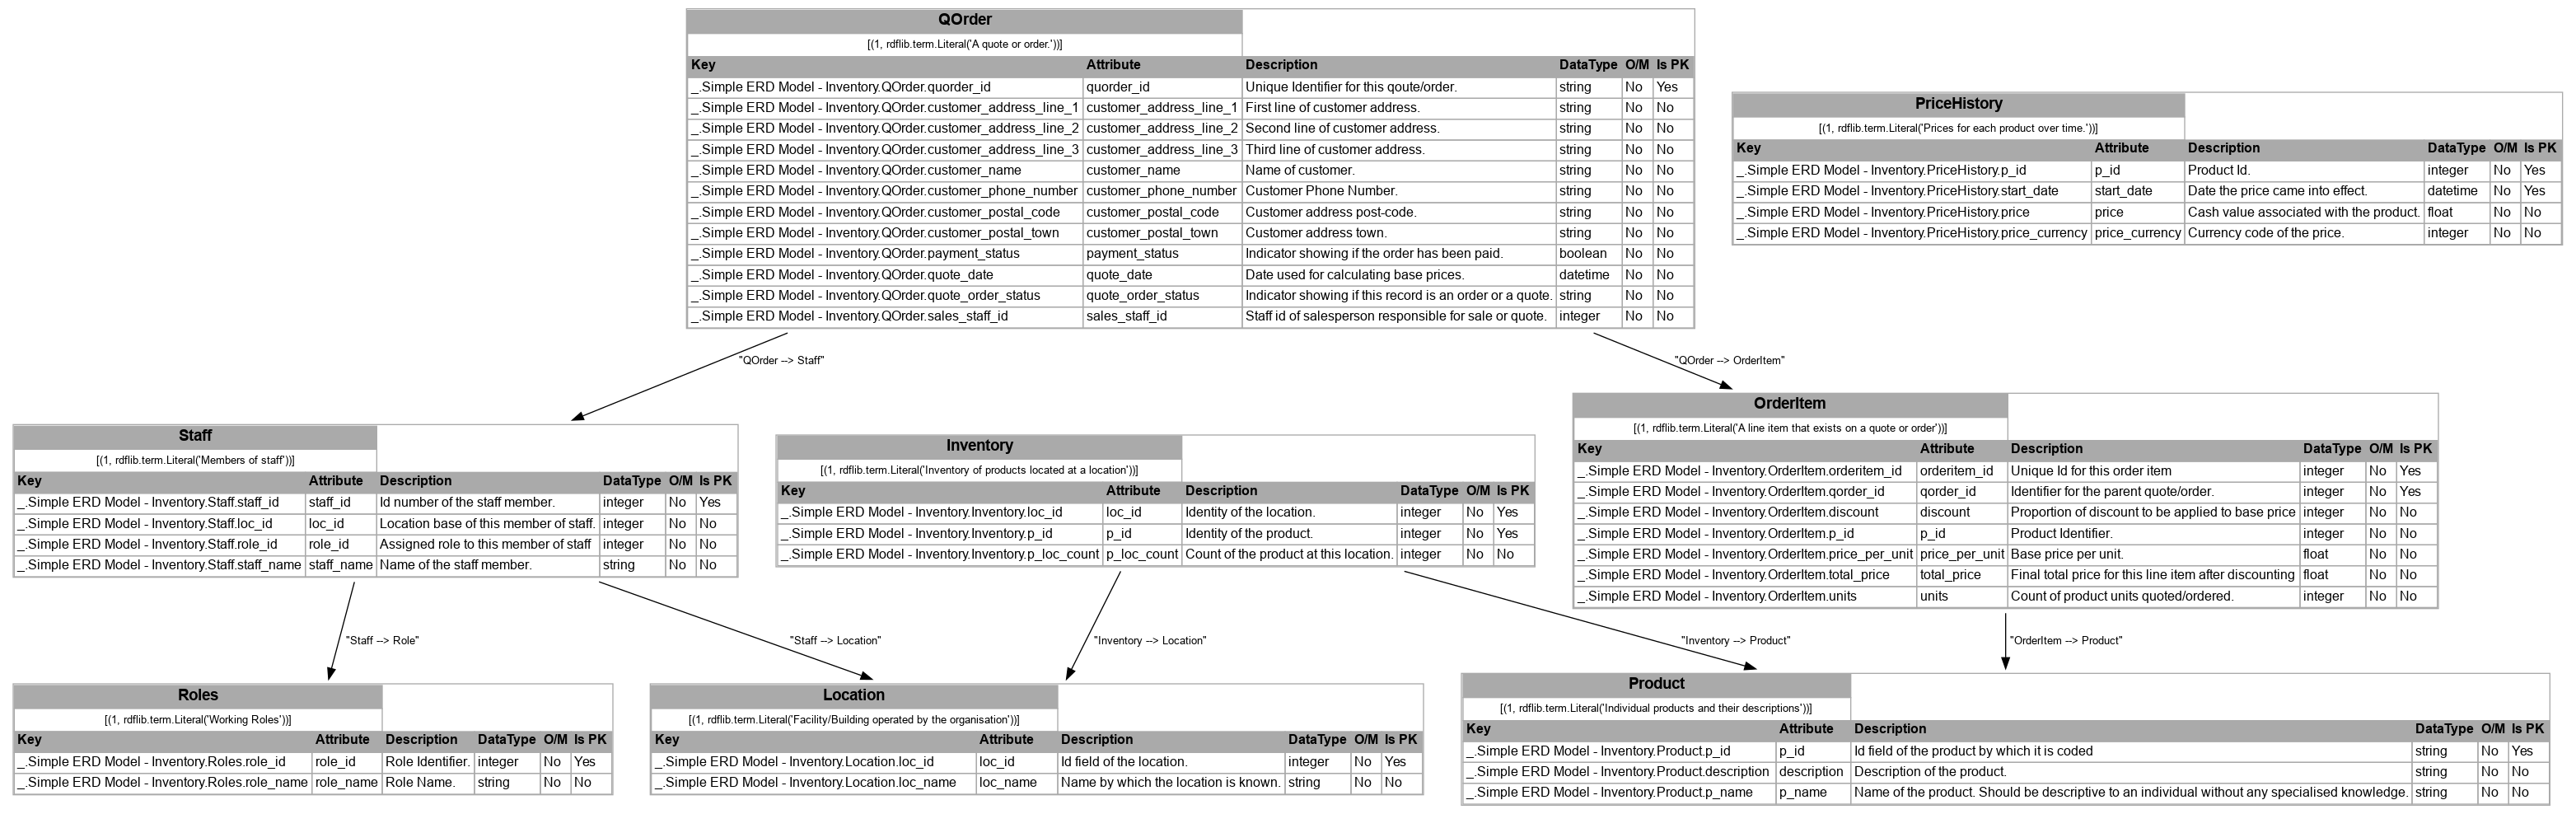

In [29]:
display(Image(DMEAR_vis.DMEAR_vizdiff_to_graph(s2, s2, option_dict, engine="dot", v_type="png")))

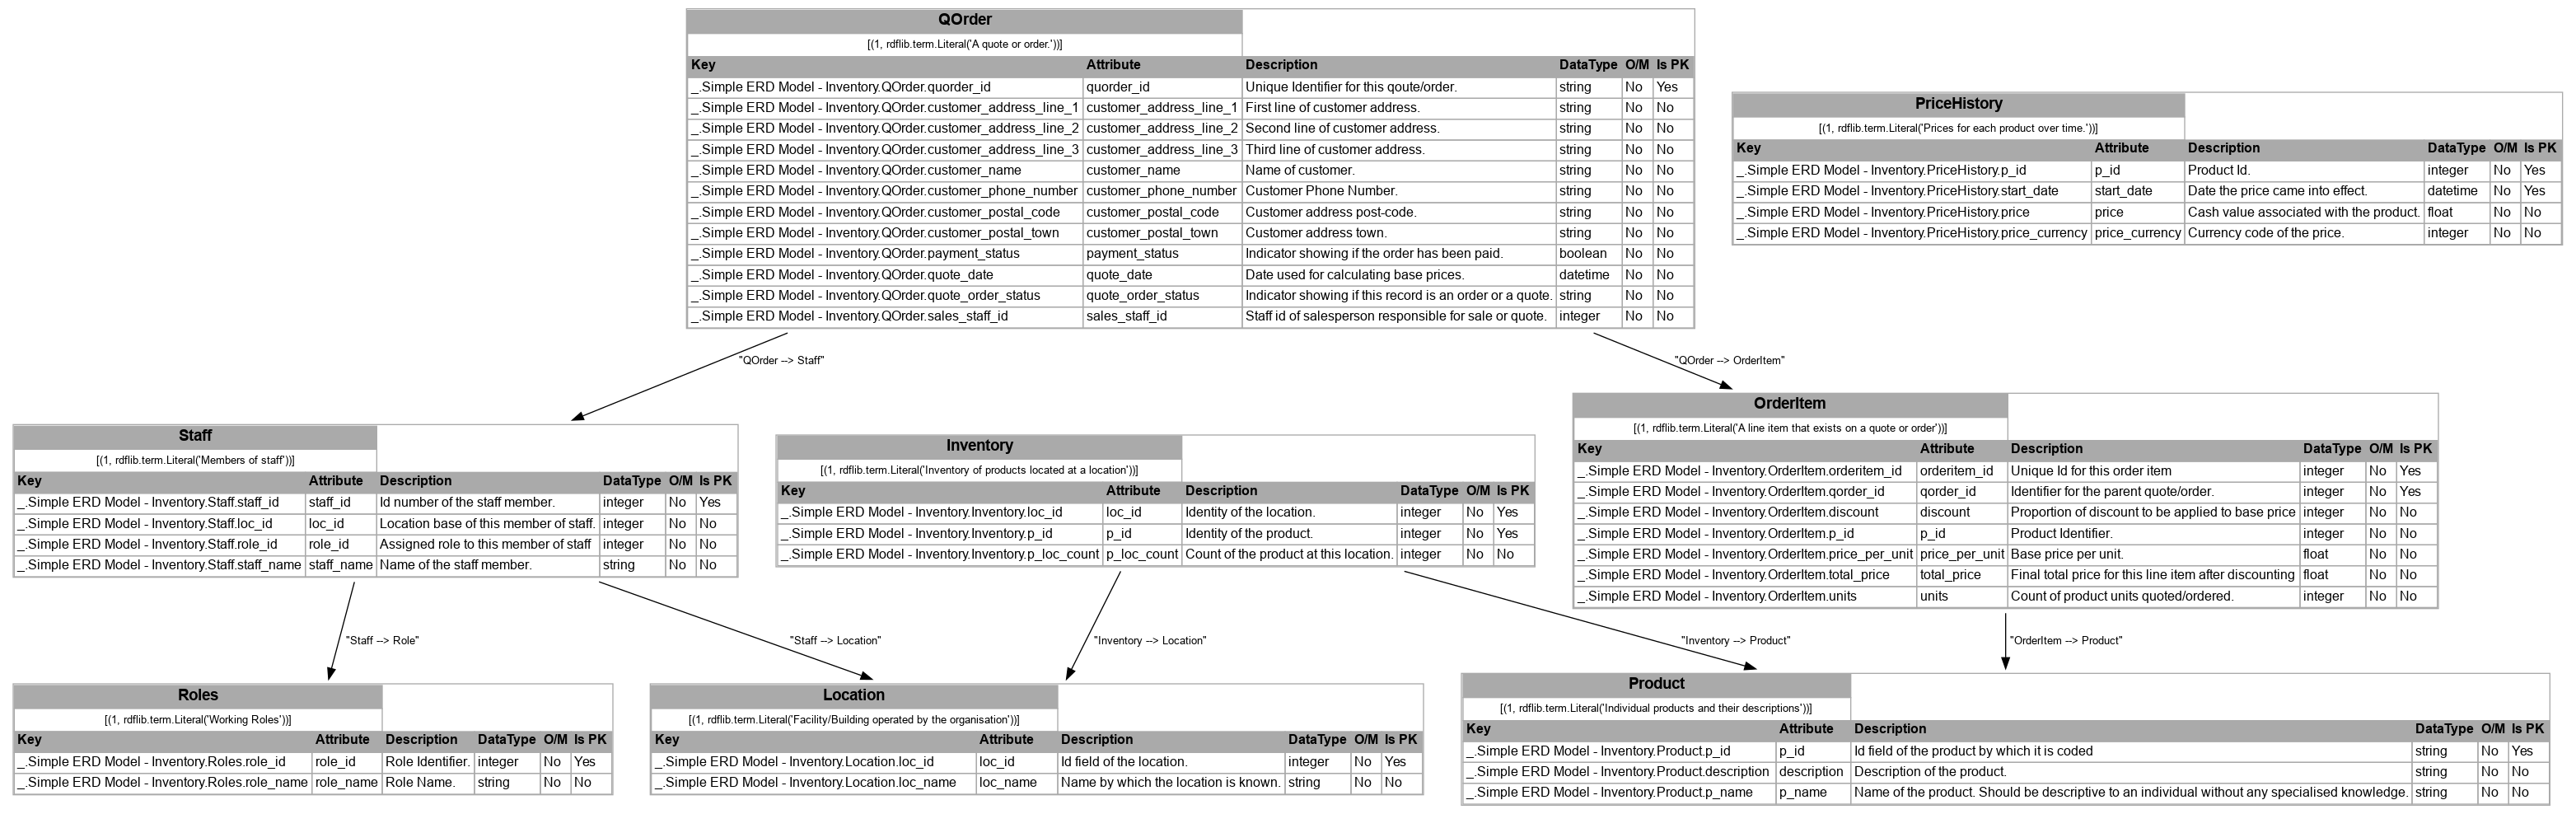

In [30]:
display(Image(DMEAR_vis.DMEAR_vizdiff_to_graph(s2, s2, option_dict, v_type="png")))

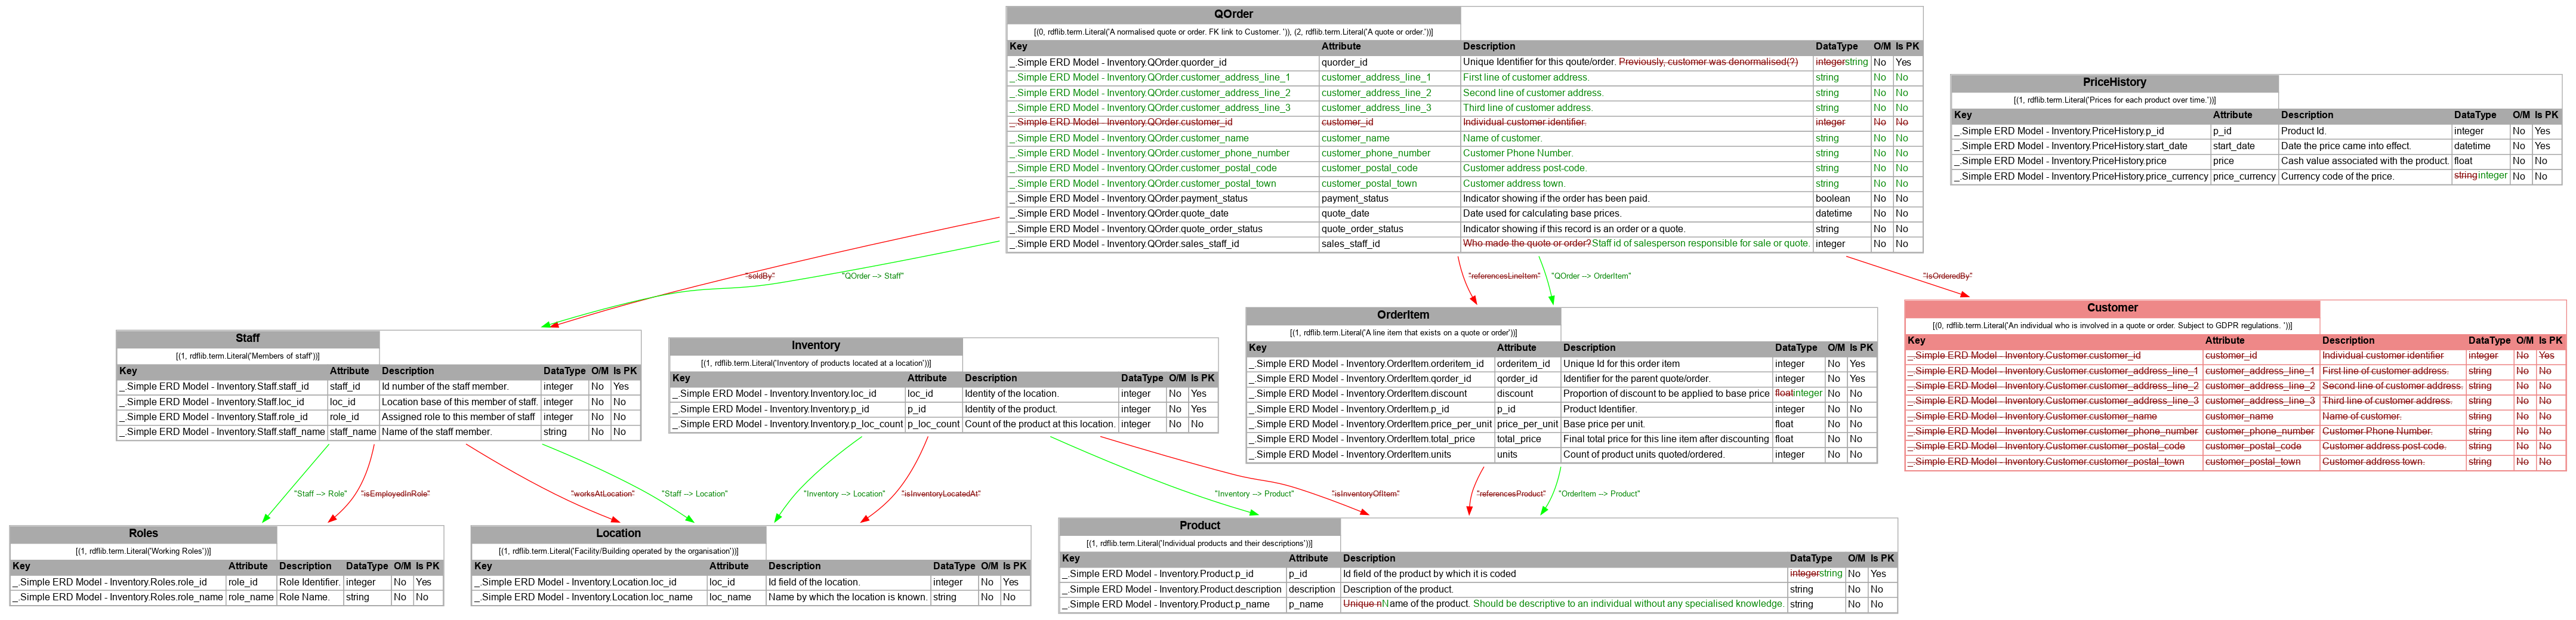

In [31]:
display(Image(DMEAR_vis.DMEAR_vizdiff_to_graph(s1, s2, option_dict, v_type="png")))

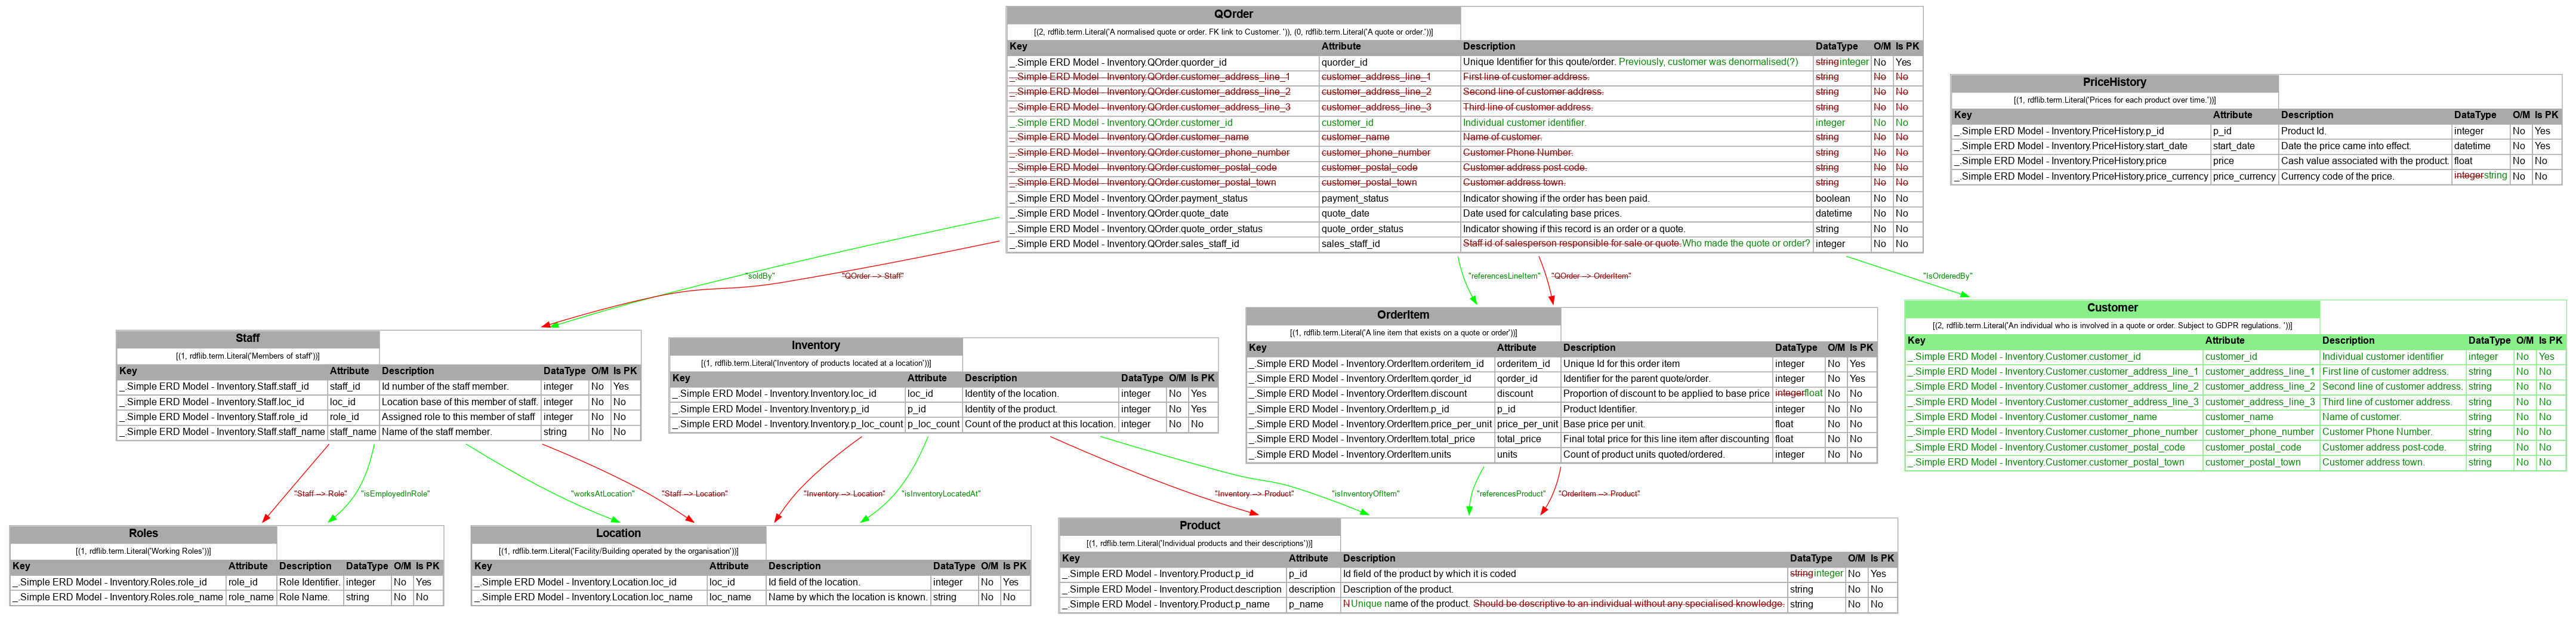

In [32]:
display(Image(DMEAR_vis.DMEAR_vizdiff_to_graph(s2, s1, option_dict, v_type="png")))

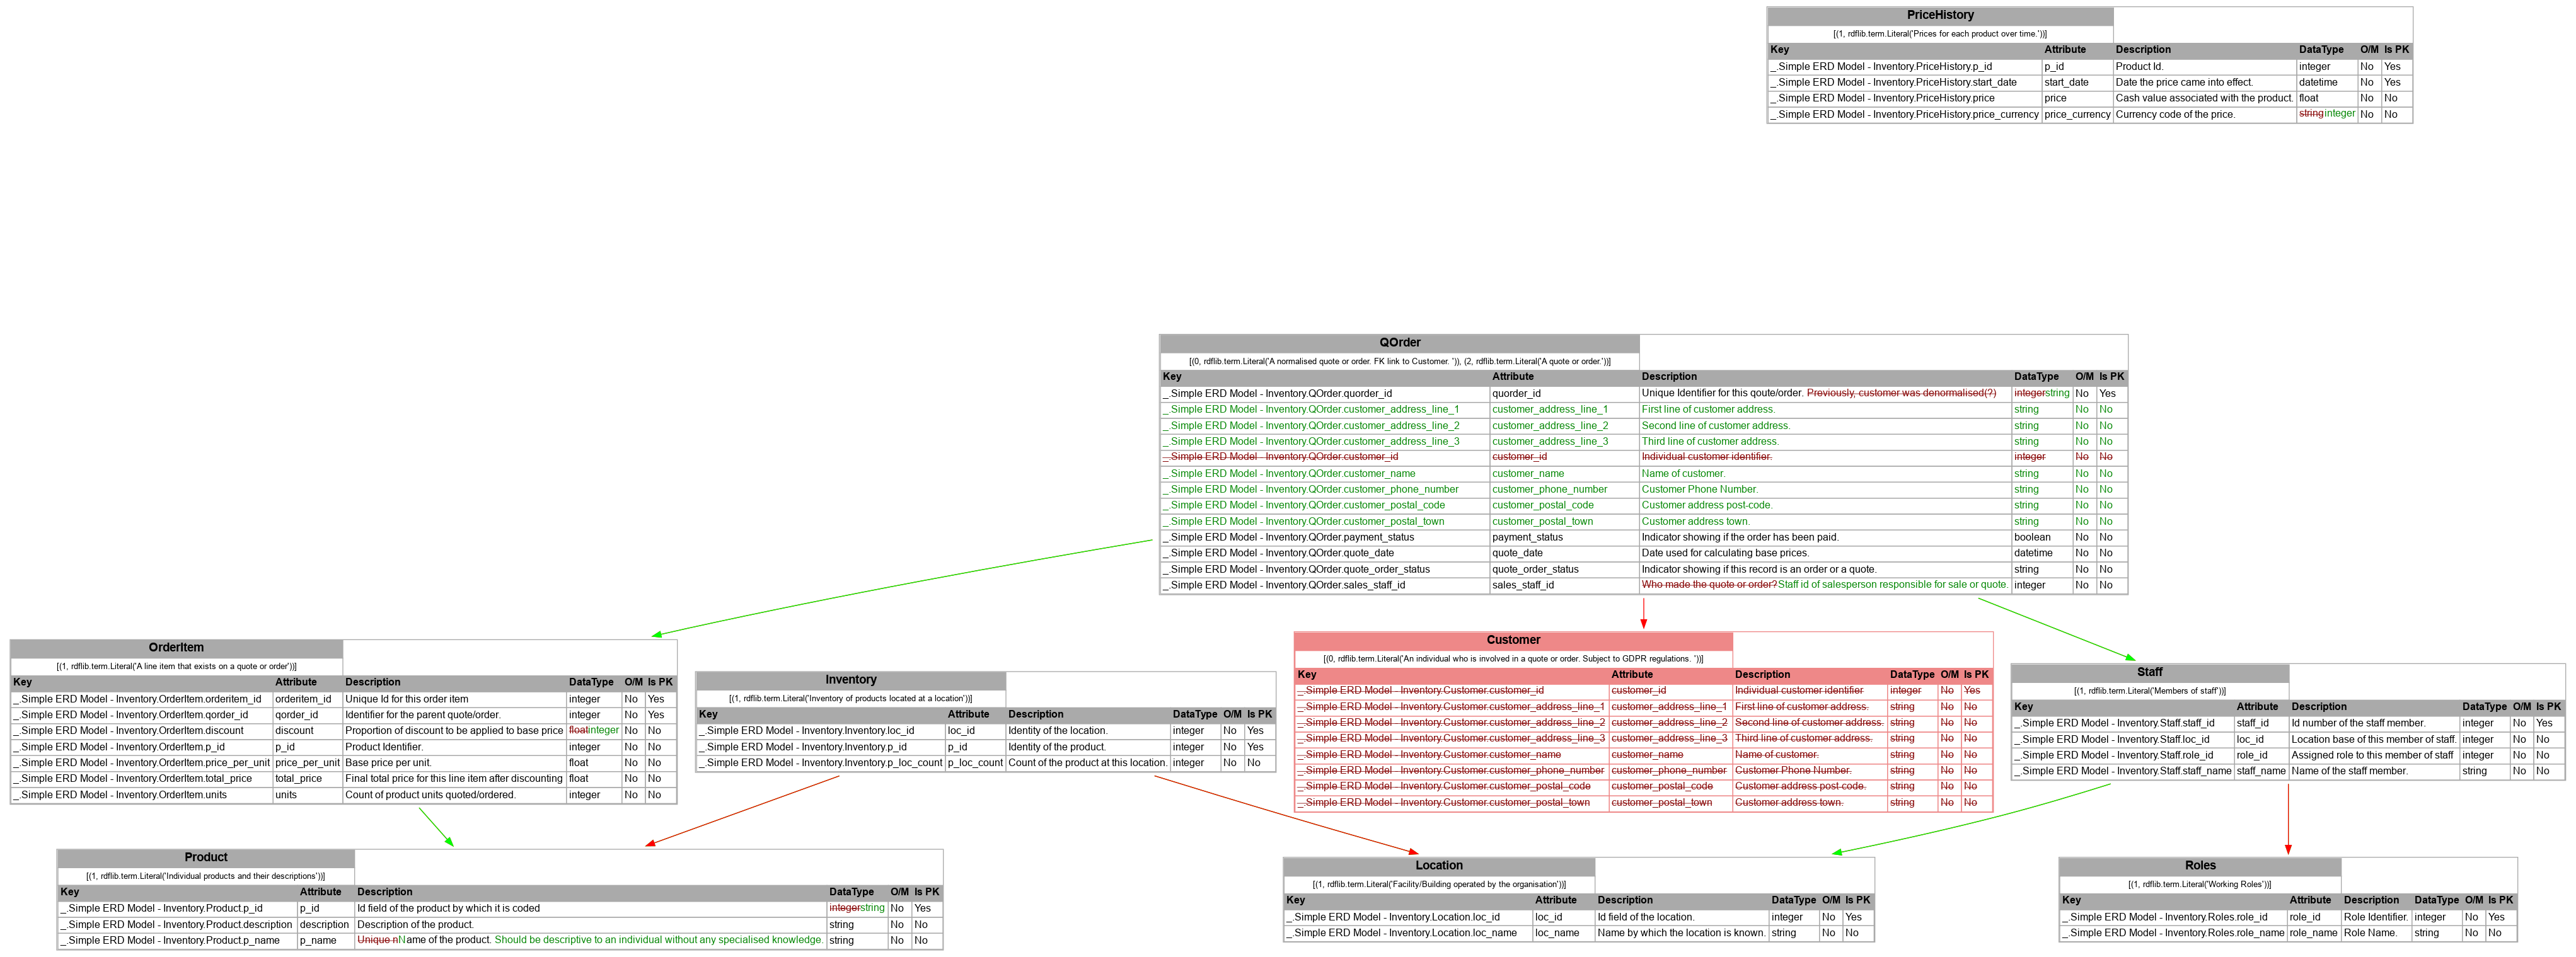

In [33]:
display(Image(DMEAR_vis.DMEAR_vizdiff_to_graph(s1, s2, option_dict, engine="dot", graph_options={ "pack" : True, "packMode" : "\"node\"" }, v_type="png")))

In [ ]:
assert False

In [ ]:
mpd = {"created" : "2023-09-26", 
                   "creator" : "tomk", 
                   "description" : "IBM MDM Diagram", 
                   "title" : "IBM MDM Diagram", 
                   "modified" : "2023-09-26"}
metadata_payload = repo.meta_data_package_template( mpd )
title = "IBM MDM Diagram v0.1"
model_data = pd.read_csv(r"../sample/mdm_v11_3_pdm_dmear.csv", index_col="Sequence", dtype=file_dtypes)
datarows = [dict({rk:get_field(rv) for rk, rv in r.items()}) for i,r in model_data.iterrows()]
repo.load_serialization_to_discourse("Data Model Entity Attribute Relation Serialization", mpd['title'], metadata_payload, datarows)

In [ ]:
qr = repo.run_cached_query("get_discourse_details.sparql")
qr_df = pd.DataFrame(qr)
qr_df

In [ ]:
qi = qr_df.query("description in ['IBM MDM Diagram'] ").index.values
d1 = qr_df.iloc[qi[0]]['discourse']

In [ ]:

qr = repo.run_cached_query("get_discourse_posits_parms_discourse_iris.sparql", parameters=[",".join([URIRef(d1).n3()])], native_rdflib=True)
#results = list([{k:v[e] for e,k in enumerate([v.n3()[1:] for v in qr.vars])} for v in qr])
dcontents = pd.DataFrame(qr)
#set(dcontents['p'])
dcontents['triple'] = dcontents.apply(lambda x : tuple([x['s'], x['p'], x['o']]), axis=1)
dcd = dcontents.groupby(['discourse'])['triple'].agg(set).to_dict()

In [ ]:


s1 = dcd.get(URIRef(d1))

In [ ]:
option_dict = { "u_label" : False, 
                "label" : True, 
                "desc" : True, 
                "optionality" : False, 
                "pk" : False, 
                "datatype" : False }


In [ ]:
display(Image(DMEAR_vis.DMEAR_vizdiff_to_graph(s1, s1, option_dict, graph_options={ "pack" : True, "packMode" : "\"node\"" }, v_type="png")))

In [ ]:
svg_data=DMEAR_vis.DMEAR_vizdiff_to_graph(s1, s1, option_dict, graph_options={ "pack" : True, "packMode" : "\"node\"" }, v_type="svg")

In [ ]:
with open("svg_test.svg", "w") as f:
    f.write(_.decode("utf-8"))

In [ ]:
HTML(_.decode("utf-8"))

In [ ]:

display(Image(DMEAR_vis.DMEAR_vizdiff_to_graph(s1, s1, option_dict, graph_options={ "pack" : True, "packMode" : "\"node\"" }, v_type="png")))

In [ ]:
assert False

In [ ]:
dot_text = DMEAR_vis.DMEAR_vizdiff_to_dot(s1, s1)
dg = pydotplus.graph_from_dot_data(dot_text)
png = dg.create_png()
display(Image(png))

In [ ]:
assert False

In [ ]:
def typed_dictionary_from_triples(triple_set):
    type_d={}
    for t in triple_set:
        if t[1]==URIRef("http://www.w3.org/1999/02/22-rdf-syntax-ns#type"):
            if t[2] not in type_d.keys():
                type_d[t[2]]=set([t[0]])
            else:
                type_d[t[2]].add(t[0])
                
    return type_d


def diffset(S1, S2):
    # Given two input sets, s1 and s2, return the Left difference, Intersection and Right difference between them
    L = S1.difference(S2)
    I = S1.intersection(S2)
    R = S2.difference(S1)
    return L,I,R

def LIR_test(triple, LIR_tuple):
    for e,s in enumerate(LIR_tuple):
        if triple in s:
            return e
    return None
    

def property_per_entity(triple_set, entity):
    property_d={}
    for t in triple_set:
        if t[0] == entity:
            if t[1] not in property_d.keys():
                property_d[t[1]]=set([t[2]])
            else:
                property_d[t[1]].add(t[2])
    return property_d

def retrieve_property_meta(triple_set, LIR_tuple, subject, predicate):
    meta_collection=[]
    for s,p,o in triple_set:
        if s==subject and p==predicate:
            LIR_loc=LIR_test((s,p,o), LIR_tuple)
            meta_collection.append((LIR_loc, o))
    return meta_collection
            
    
    

In [ ]:
def DMEAR_vizdiff_to_dot(S1, S2):
    rdf_type_uri = URIRef("http://www.w3.org/1999/02/22-rdf-syntax-ns#type")
    class_uri = URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Class')
    relation_uri = URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Relationship')
    attribute_uri = URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Attribute')
    L, I, R = diffset(S1, S2)
    obj_dict = typed_dictionary_from_triples(S1.union(S2))
    entities=[]
    ent_node_dir={}
    DMEAR_types = [ URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Model'), 
                    URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Class'),
                    URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Attribute'), 
                    URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Relationship')
                    ]
    for e,entity in enumerate(obj_dict[class_uri]):
        node_name=f"node_{e}"
        ent_node_dir[entity]=node_name
        def_triple = (entity, rdf_type_uri, class_uri)
        LIR_loc = LIR_test(def_triple, (L,I,R))
        eprops = property_per_entity(S1.union(S2), entity)
        unique_ids = retrieve_property_meta(S1.union(S2), (L,I,R), entity, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#UniqueIdentifier'))
        labels = retrieve_property_meta(S1.union(S2), (L,I,R), entity, URIRef('http://www.w3.org/2000/01/rdf-schema#label'))
        descriptions = retrieve_property_meta(S1.union(S2), (L,I,R), entity, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Description'))
        content_elements = retrieve_property_meta(S1.union(S2), (L,I,R), entity, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Contains'))
        # possible filter on content_elements having type-assignments of Attribute
        attr_elements = []
        for a_lir, attribute in content_elements:
            aprops = property_per_entity(S1.union(S2), attribute)
            a_labels = retrieve_property_meta(S1.union(S2), (L,I,R), attribute, URIRef('http://www.w3.org/2000/01/rdf-schema#label'))
            a_descs = retrieve_property_meta(S1.union(S2), (L,I,R), attribute, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Description'))
            a_dtypes = retrieve_property_meta(S1.union(S2), (L,I,R), attribute, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#DataType'))
            a_uniques = retrieve_property_meta(S1.union(S2), (L,I,R), attribute, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#UniqueIdentifier'))
            a_optionalities = retrieve_property_meta(S1.union(S2), (L,I,R), attribute, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Optionality'))
            a_pks = retrieve_property_meta(S1.union(S2), (L,I,R), attribute, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#isIdentifierForClass'))
            attribute_package = {"uri" : attribute, 
                                 "lir" : a_lir, 
                                 "u_label" : a_uniques, 
                                 "label" : a_labels, 
                                 "desc" : a_descs, 
                                 "optionality" : a_optionalities, 
                                 "pk" : a_pks}
            attr_elements.append(attribute_package)
            
        entity_package = {"uri" : entity, 
                          "node" : node_name, 
                          "lir" : LIR_loc, 
                          "u_label" : unique_ids, 
                          "label" : labels, 
                          "desc" : descriptions, 
                          "attributes" : attr_elements}
        
        entities.append(entity_package)
    
    
    relations=[]
    
    for relation in obj_dict[relation_uri]:
        #print(relation)
        rel_triple = (relation, rdf_type_uri, relation_uri)
        rel_lir = LIR_test(rel_triple, (L,I,R))
        rel_props = property_per_entity(S1.union(S2), relation)
        #for k in rel_props.keys():
        #    print (k)
        rel_from_class = retrieve_property_meta(S1.union(S2), (L,I,R), relation, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipFromClass'))
        rel_to_class = retrieve_property_meta(S1.union(S2), (L,I,R), relation, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipToClass'))
        rel_from_cardinality = retrieve_property_meta(S1.union(S2), (L,I,R), relation, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipFromCardinality'))
        rel_to_cardinality = retrieve_property_meta(S1.union(S2), (L,I,R), relation, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipToCardinality'))
        rel_from_attribute = retrieve_property_meta(S1.union(S2), (L,I,R), relation, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipFromAttribute'))
        rel_to_attribute = retrieve_property_meta(S1.union(S2), (L,I,R), relation, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipToAttribute'))
        rel_unique = retrieve_property_meta(S1.union(S2), (L,I,R), relation, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#UniqueIdentifier'))
        rel_label = retrieve_property_meta(S1.union(S2), (L,I,R), relation, URIRef('http://www.w3.org/2000/01/rdf-schema#label'))
        rel_descs = retrieve_property_meta(S1.union(S2), (L,I,R), relation, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Description'))
        rel_type = retrieve_property_meta(S1.union(S2), (L,I,R), relation, URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'))
        rel_package = {"uri" : relation, 
                       "lir" : rel_lir, 
                       "u_label" : rel_unique, 
                       "label" : rel_label, 
                       "desc" : rel_descs,
                       "from_class" : rel_from_class, 
                       "to_class" : rel_to_class, 
                       "from_node" : ent_node_dir[rel_from_class[0][1]],
                       "to_node" : ent_node_dir[rel_to_class[0][1]],
                       "from_attribute" : rel_from_attribute, 
                       "to_attribute" : rel_to_attribute, 
                       "from_cardinality" : rel_from_cardinality, 
                       "to_cardinality" : rel_to_cardinality,
                       "rel_type" : rel_type}
        
        relations.append(rel_package)
    
    
    ## Build up entities and relations in dot language

        

    
    #col_dir = { 0 : "'#068806'", 1 : "'#000000'", 2 : "'#880606'"}
    col_dir = { 0 : "RED", 1 : "BLACK", 2 : "GREEN"}
    fg_col_dir = { 0 : "#880606", 1 : "#000000", 2 : "#068806"}
    alt_col_dir = { 0 : "#EE8888", 1 : "#AAAAAA", 2 : "#88EE88"}
    #start = """digraph { \n graph [fontname = "helvetica"]; \n node [ fontname="DejaVu Sans" ] ; \n edge [fontname = "helvetica"]; \n"""
    start = """digraph { \n graph [fontname = "helvetica"]; \n node [ fontname="helvetica" ] ; \n edge [fontname = "helvetica"]; \n"""
     
 
 
    ent_content = ""
    for ents in entities:
        att_content=""
        
        node, col, alt_col, label, uri, desc = ents["node"], col_dir[ents["lir"]], alt_col_dir[ents["lir"]], ents["label"][0][1], ents["uri"], ents["desc"]
                    
        #"<br/>".join(text_utils.ww(html.escape(ents["desc"][0][1]),40))
            
        if len (ents["attributes"])>0:
            # Set header for attribute table
            attrstr = f"""<tr><td align='left' bgcolor='{alt_col}'><font point-size='12' color='#000000'><B>Attribute</B></font></td><td align='left' bgcolor='{alt_col}'><font point-size='12' color='#000000'><B>Identifier</B></font></td></tr>"""
            att_content=att_content+attrstr
        #print([(x[6][0][1].n3(), x[3][0][1].n3())for x in ents[6]])
        e_sort={"\"Yes\"":0, "\"No\"": 1}
        for att in sorted(ents["attributes"], key=lambda x : (e_sort[x["pk"][0][1].n3()], x["u_label"][0][1].n3())):
            attr=att["label"][0][1]
            pk=att["pk"][0][1]
            attr_lir = att["lir"]
            
            attr_col=fg_col_dir[attr_lir]
            #print(attr_col)
            if attr_lir != 0:
                attrstr = f"""<tr><td align='left'><font point-size='12' color='{attr_col}'>{attr}</font></td><td align='left'><font point-size='12' color='{attr_col}'>{pk}</font></td></tr>"""
            else:
                attrstr = f"""<tr><td align='left'><font point-size='12' color='{attr_col}'><s>{attr}</s></font></td><td align='left'><font point-size='12' color='{attr_col}'><s>{pk}</s></font></td></tr>"""
            att_content=att_content+attrstr
        
        #print(label, col)

        entstr = f"""{node} [ shape=none, color={col} label=< <table color='{alt_col}'
         cellborder='1' cellspacing='0' border='1'><tr>
        <td colspan='2' bgcolor='{alt_col}'><B>{label}</B></td></tr><tr>
        <td href='{uri}' bgcolor='#ffffff' colspan='2' ALIGN='center'>
        <font point-size='10' color='#000000'>{desc}</font>
        </td>
        </tr>{att_content}</table> > ] \n"""

        ent_content = ent_content + entstr
            
    
    relstr = ""

    
    for rels in relations:
        fromnode, tonode, rel_col, rel_label = rels["from_node"], rels["to_node"], col_dir[rels["lir"]], rels["label"][0][1].n3()
        fg_rel_col = fg_col_dir[rels["lir"]]
        if rels["lir"]!=0:
            relstr = relstr + f"""\t{fromnode} -> {tonode} [ color={rel_col}, label=< <font point-size='10' color='{fg_rel_col}'>{rel_label}</font> > ] ;\n"""
        else:
            relstr = relstr + f"""\t{fromnode} -> {tonode} [ color={rel_col}, label=< <font point-size='10' color='{fg_rel_col}'><s>{rel_label}</s></font> > ] ;\n"""
        
    return start  + relstr + ent_content + "}"

In [ ]:
dot_text = DMEAR_vizdiff_to_dot(s1, s1)
#print(dot_text)
dg = pydotplus.graph_from_dot_data(dot_text)
png = dg.create_png()
display(Image(png))

In [ ]:
dot_text = DMEAR_vizdiff_to_dot(s2, s2)
#print(dot_text)
dg = pydotplus.graph_from_dot_data(dot_text)
png = dg.create_png()
display(Image(png))

In [ ]:
dot_text = DMEAR_vizdiff_to_dot(s1, s2)
#print(dot_text)
dg = pydotplus.graph_from_dot_data(dot_text)
png = dg.create_png()
display(Image(png))

In [ ]:
dot_text = DMEAR_vizdiff_to_dot(s2, s1)
#print(dot_text)
dg = pydotplus.graph_from_dot_data(dot_text)
png = dg.create_png()
display(Image(png))

In [ ]:
timestamp = datetime.now()

elapsed = timestamp - start
print(elapsed)

In [ ]:
dot_text = DMEAR_vizdiff_to_dot(s2, s2)
print(dot_text)
dg = pydotplus.graph_from_dot_data(dot_text)
png = dg.create_png()
display(Image(png))

In [ ]:
node = dg.get_nodes()[0]

In [ ]:
node.get_pos()

In [ ]:
dg.create_dot()

In [ ]:
node = dg.get_nodes()[0]

In [ ]:
import difflib

In [ ]:
a = "Mary had a little lamb. Its fleece as white as snow."
b = "Sue had a little puppy. Its eyes as dark as night."

In [ ]:
diffs = difflib.SequenceMatcher(None, a,b)

In [ ]:
diffs.a

In [ ]:
diffs.b

In [ ]:
from IPython.display import display
from IPython.display import HTML

In [ ]:
output=""
for c, i1, i2, j1, j2 in diffs.get_opcodes():
    if c in ["replace", "delete"]:
        print(c, b[j1:j2])
        output=output+"<font color=\"red\"><s>"+a[i1:i2]+"</s></font>"+"<font color=\"green\">" + b[j1:j2]+"</font>"
    elif c in "insert":
        print(c, b[j1:j2])
        output=output+"<font color=\"green\">" + b[j1:j2]+"</font>"
    else:
        print(c, b[j1:j2])
        output=output+b[j1:j2]
        
display(HTML(output))
        

In [ ]:
from IPython.display import display
from IPython.display import HTML

In [ ]:
a = "This text starts the same. And ends the same way."
b = "This text starts the same, but includes a section that deviates from the original before ending the same way."

In [ ]:
def markup_text_diffs(text_a, text_b):

    diffs = difflib.SequenceMatcher(None, text_a,text_b)

    output=""
    for c, i1, i2, j1, j2 in diffs.get_opcodes():
        if c in ["replace", "delete"]:
            #print(c, b[j1:j2])
            output=output+"<font color=\"red\"><s>"+text_a[i1:i2]+"</s></font>"+"<font color=\"green\">" + text_b[j1:j2]+"</font>"
        elif c in "insert":
            #print(c, b[j1:j2])
            output=output+"<font color=\"green\">" + text_b[j1:j2]+"</font>"
        else:
            #print(c, b[j1:j2])
            output=output+text_b[j1:j2]
    return output

        

In [ ]:
a = "Mary yearned for a little lamb its fleece as white as snow."
b = "Many years ago, a little bird lived in a tree. What did it know."
output = markup_text_diffs(a, b)
display(HTML(output))

In [ ]:
diffs.get_opcodes()

In [ ]:
output

In [ ]:
a = "Mary yearned for a little lamb its fleece as white as snow."
b = "Many years ago, a little bird lived in a tree. What did it know."
output = markup_text_diffs(b, b)
display(HTML(output))

In [ ]:
HTML(DMEAR_vis.markup_text_diffs(a,b,{ 0 : "#880606", 1 : "#000000", 2 : "#068806", 3 : "#BB3333"}))